# 15 min Intro to Persistent Homology
### <a href="https://ben300694.github.io/" target="_blank">Benjamin Matthias Ruppik</a>, Max-Planck Institute for Mathematics, Bonn

## Filtrations of topological spaces


### Motivating example: Sublevel filtrations

A lot of topological spaces $X$ come with a natural *filtration*,
an increasing union of subspaces $X_{i}$,
i.e. for $i < j$ in the index set we have $X_{i} \subseteq X_{j}$.

Here is an example of a topological space $X$
(with a Morse function $f \colon X \rightarrow \mathbb{R}$) ...

<img src="img/topological_space_Morse_position.jpg" width=400 title="Surface of genus 2 in Morse position with 3 minima, 7 saddles, 2 maxima"/>

... and the *sublevel set filtration*
$X_{r} = f^{-1}((-\infty, r])$:

<img src="img/Morse_sublevel_filtration.jpg" width=600 title="Surface of genus 2 sublevel filtration"/>

<img src="img/Morse_complete_sublevel_filration.png" width=1000 title="Surface of genus 2 sublevel filtration 8 movie frames"/>

### Persistent homology

The $i$-dimensional homology group of a space measures $i$-dimensional holes (or cavities).

\begin{equation}
H_{i}(X) = i\textrm{-dim cycles modulo boundaries}
\end{equation}

Here are some examples of 1-dimensional homology classes:

<img src="img/Morse_homology_classes.png" width=1000 title="Surface of genus 2 sublevel filtration 8 movie frames with some homology classes drawn in."/>

persist = "to stick around for a long time"

Example where a first homology class persists from its appearance until the end in <span style="color:red">red</span>.

Example where a first homology class appears but soon thereafter is canceled at a maximum in <span style="color:green">green</span>.

**Slogan: Persistent homology measures non-trivial cycles which can be detected in significant parts of the filtrations.**

## Toy data and Simplex trees

### Defining a simplicial complex with filtration


<img src="img/toy_simplicial_complex.jpg" width=800 title="Toy simplicial complex"/>

In [3]:
import pandas
import gudhi
import numpy as np
import networkx
from pylab import *

In [4]:
# Toy example working with the simplex tree

toy_st = gudhi.SimplexTree()

# 0-simplicies in filtration level 0.0
for i in range(0, 5):
    toy_st.insert([i], 0.0)

# 1-simplicies in filtration level 1.0
toy_st.insert([0, 1], 1.0)
toy_st.insert([0, 2], 1.0)
toy_st.insert([1, 3], 1.0)
toy_st.insert([2, 3], 1.0)

# additional 1-simplex in filtration level 2.0
toy_st.insert([1, 2], 2.0)

# last 1-simplex and 2-simplex
toy_st.insert([3, 4], 3.0)
toy_st.insert([0, 1, 2], 3.0)

for simplex in toy_st.get_filtration():
    print(simplex)

([0], 0.0)
([1], 0.0)
([2], 0.0)
([3], 0.0)
([4], 0.0)
([0, 1], 1.0)
([0, 2], 1.0)
([1, 3], 1.0)
([2, 3], 1.0)
([1, 2], 2.0)
([0, 1, 2], 3.0)
([3, 4], 3.0)


<img src="img/toy_simplicial_complex_homology.jpg" width=800 title="Toy simplicial complex with homology classes"/>

[(1, (1.0, inf)), (1, (2.0, 3.0)), (0, (0.0, inf)), (0, (0.0, 3.0)), (0, (0.0, 1.0)), (0, (0.0, 1.0)), (0, (0.0, 1.0))]


<AxesSubplot:title={'center':'Persistence barcode'}>

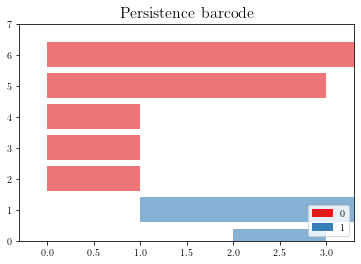

In [5]:
toy_bar = toy_st.persistence(min_persistence=0.0, persistence_dim_max=True)
print(toy_bar)

gudhi.plot_persistence_barcode(persistence=toy_bar, legend=True)

[(1, (1.0, inf)), (1, (2.0, 3.0)), (0, (0.0, inf)), (0, (0.0, 3.0)), (0, (0.0, 1.0)), (0, (0.0, 1.0)), (0, (0.0, 1.0))]


<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

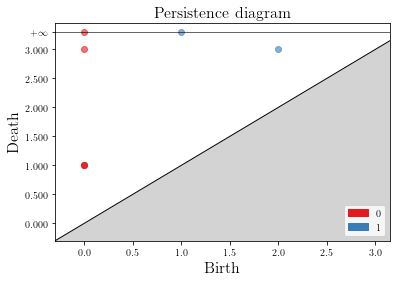

In [23]:
gudhi.plot_persistence_diagram(persistence=toy_bar, legend=True)

## Persistent homology applied to "real data": Clique complex of a graph

Repository of various graphs https://networkrepository.com/index.php

<img src="img/network_repository_website.png" width=700 title="Screenshot of the Network Repositoy website"/>

Quote: Data collected about Facebook pages (November 2017). These datasets represent blue verified Facebook page networks of different categories. Nodes represent the pages and edges are mutual likes among them.

Let us take a graph representing a social network:
 * each vertex represents a food-related facebook page
 * there is an edge between the vertices v and w whenever the pages mutually like each other


The clique complex of any graph G is exactly a Vietoris–Rips complex for the metric space 
where the points are vertices of G and and the distances are the lengths of the shortest paths in G
This is also known as the flag complex of a graph.


In [7]:
def simplex_graph_from_csv(path_to_csv, delimiter=','):
    """
    Input: Path to csv file with list of edges
    
    Output: 1-skeleton of simplex tree
    """
    # Create networkx graph from edge list
    G_nx = networkx.read_edgelist(path_to_csv, delimiter=',', nodetype=int)
    
    # Create simplex tree
    st = gudhi.SimplexTree()

    # Insert vertices into simplex tree
    for v in G_nx.nodes():
        st.insert([v], 0.0)
    # Insert edges into simplex tree
    for e in G_nx.edges():
        st.insert(e, 1.0)

    return st

/home/ben/anaconda3/envs/TDA/lib/python3.9/site-packages/gudhi/persistence_graphical_tools.py:369: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  axes.axis([axis_start, axis_end, axis_start, infinity + delta/2])
/home/ben/anaconda3/envs/TDA/lib/python3.9/site-packages/gudhi/persistence_graphical_tools.py:369: UserWarning: Attempting to set identical bottom == top == 1.0 results in singular transformations; automatically expanding.
  axes.axis([axis_start, axis_end, axis_start, infinity + delta/2])


<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

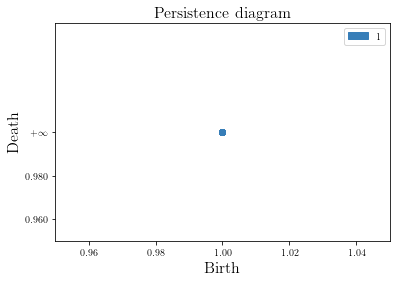

In [9]:
# Import the real data graph and build 1-complex

path_to_fb_pages_food_csv = './datasets/fb-pages-food/fb-pages-food.edges'

fb_pages_food_st = simplex_graph_from_csv(path_to_fb_pages_food_csv)

#for simplex in fb_pages_food_st.get_filtration():
#    print(simplex)

fb_pages_food_bar = fb_pages_food_st.persistence(min_persistence=-1.0, persistence_dim_max=True)
# print(fb_pages_food_bar)

gudhi.plot_persistence_diagram(fb_pages_food_bar, legend=True)

In [11]:
def simplex_2_complex_from_csv(path_to_csv, delimiter=','):
    """
    Input: Path to csv file with list of edges
    
    Output: 2-skeleton of simplex tree for clique complex
    """
    # Create networkx graph from edge list
    G_nx = networkx.read_edgelist(path_to_csv, delimiter=',', nodetype=int)
    
    # Create simplex tree
    st = gudhi.SimplexTree()

    # Insert vertices into simplex tree
    for v in G_nx.nodes():
        st.insert([v], 0.0)
    # Insert edges into simplex tree
    for e in G_nx.edges():
        st.insert(e, 1.0)
        
    # Inserting cliques with 3 members
    for clq in networkx.clique.find_cliques(G_nx):
        if len(clq) == 3:
            print('Adding clique ', clq)
            st.insert(clq, 2.0)
        
    return st

Adding clique  [0, 603, 58]
Adding clique  [3, 352, 40]
Adding clique  [3, 65, 608]
Adding clique  [3, 65, 185]
Adding clique  [3, 65, 450]
Adding clique  [3, 65, 299]
Adding clique  [3, 484, 40]
Adding clique  [3, 377, 608]
Adding clique  [3, 377, 185]
Adding clique  [3, 377, 450]
Adding clique  [3, 377, 299]
Adding clique  [8, 73, 369]
Adding clique  [17, 65, 608]
Adding clique  [17, 65, 185]
Adding clique  [17, 65, 450]
Adding clique  [17, 65, 299]
Adding clique  [21, 329, 441]
Adding clique  [21, 516, 334]
Adding clique  [22, 187, 104]
Adding clique  [23, 257, 157]
Adding clique  [23, 434, 58]
Adding clique  [23, 157, 288]
Adding clique  [31, 449, 193]
Adding clique  [31, 193, 41]
Adding clique  [31, 193, 285]
Adding clique  [31, 518, 327]
Adding clique  [31, 518, 424]
Adding clique  [31, 488, 524]
Adding clique  [31, 491, 424]
Adding clique  [31, 491, 142]
Adding clique  [31, 507, 546]
Adding clique  [39, 576, 603]
Adding clique  [39, 340, 43]
Adding clique  [39, 340, 603]
Adding 

<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

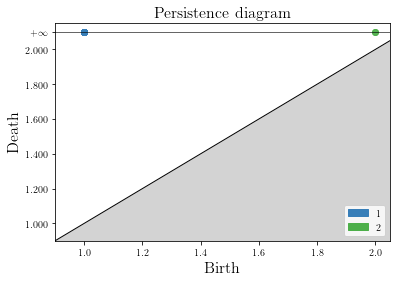

In [14]:
# Import the real data graph and build 2-complex

path_to_fb_pages_food_csv = './datasets/fb-pages-food/fb-pages-food.edges'

fb_pages_food_st = simplex_2_complex_from_csv(path_to_fb_pages_food_csv)

#for simplex in fb_pages_food_st.get_filtration():
#    print(simplex)

fb_pages_food_bar = fb_pages_food_st.persistence(min_persistence=-1.0, persistence_dim_max=True)
#print(fb_pages_food_bar)

gudhi.plot_persistence_diagram(fb_pages_food_bar, legend=True)

**TODO** Add higher-dimensional simplices

## Conclusion

In [14]:
# Comparing different persistence diagrams using the bottleneck distance
#persistence_interval_dim_1_1 = Rips_simplex_tree_1.persistence_intervals_in_dimension(1)
#persistence_interval_dim_1_2 = Rips_simplex_tree_2.persistence_intervals_in_dimension(1)

#gudhi.bottleneck_distance(persistence_interval_dim_1_1, persistence_interval_dim_1_2)

**TODO**

### Properties of the data we could detect with persistent homology

 * qualitative large scale features in the data
 * Measures both the global and local topology of a dataset
 * We can use the persistence data as input for further machine learning applications
 
 ### Drawbacks of using persistent homology
 * have to deal with noise in the data and stability
 * for example, points close to the diagonal in the persistence diagram only appear for a short time: these could come from random fluctuations in the data, but could also represent local properties
 * It can be challanging to interpret the meaning of the persistent homology groups for the application

## References

 * An introduction to Topological Data Analysis: fundamental and practical aspects for data scientists: https://arxiv.org/abs/1710.04019
 * Bot Detection on Social Networks Using Persistent Homology: https://www.semanticscholar.org/paper/Bot-Detection-on-Social-Networks-Using-Persistent-Nguyen-Aktas/e3944fac408415965b3d24d52d3ac7b7a0e9aa17
 * Persistent Homology of Collaboration Networks: https://www.hindawi.com/journals/mpe/2013/815035/
 
 
 
### Python libraries used

#### TDA tools

 * [GUDHI Python module](https://gudhi.inria.fr/)
 * https://github.com/GUDHI/TDA-tutorial

#### Graphs

 * https://networkx.org/



### Datasets
 
 @inproceedings{nr,
      title = {The Network Data Repository with Interactive Graph Analytics and Visualization},
      author={Ryan A. Rossi and Nesreen K. Ahmed},
      booktitle = {AAAI},
      url={https://networkrepository.com},
      year={2015}
 }

### Python cheat-sheet
 * np.random.random(1)[0] for a random number in the interval (0,1)

### Appendix: Vietoris-Rips complex from Distance matrix

We will consider the following graph with 5 vertices where pairwise distances are encoded in the following matrix:

In [13]:
toy_matrix = [[0,1,1,2,inf],
              [1,0,2,1,inf],
              [1,2,0,1,inf],
              [2,1,1,0,inf],
              [inf,inf,inf,inf,0]]

<img src="img/graph_distances.jpg" width=400 title="Graph with unit length edges."/>

Vietoris-Rips filtration for $r \in \mathbb{R}_{\ge 0}$:
Insert a simplex for any finite set of vertices that has diameter at most $r$.

In [4]:
graph_distance_matrix = toy_matrix

# Build Vietoris-Rips complex

skeleton = gudhi.RipsComplex(
    distance_matrix = graph_distance_matrix,
    max_edge_length = 5.0
)

Rips_simplex_tree = skeleton.create_simplex_tree(max_dimension = 3)

for simplex in Rips_simplex_tree.get_filtration():
    print(simplex)

([0], 0.0)
([1], 0.0)
([2], 0.0)
([3], 0.0)
([4], 0.0)
([0, 1], 1.0)
([0, 2], 1.0)
([1, 3], 1.0)
([2, 3], 1.0)
([1, 2], 2.0)
([0, 1, 2], 2.0)
([0, 3], 2.0)
([0, 1, 3], 2.0)
([0, 2, 3], 2.0)
([1, 2, 3], 2.0)
([0, 1, 2, 3], 2.0)


In [20]:
# Compute persistence of the simplex tree
BarCodes_Rips = Rips_simplex_tree.persistence(min_persistence=0.0, persistence_dim_max=True)

print(BarCodes_Rips)

[(1, (1.0, 2.0)), (0, (0.0, inf)), (0, (0.0, inf)), (0, (0.0, 1.0)), (0, (0.0, 1.0)), (0, (0.0, 1.0))]


<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

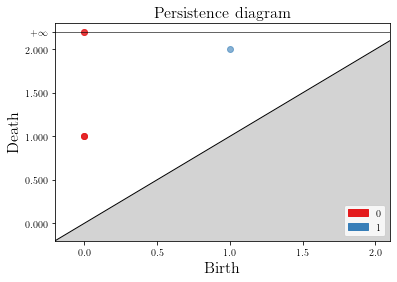

In [21]:
gudhi.plot_persistence_diagram(persistence=BarCodes_Rips, legend=True)

<AxesSubplot:title={'center':'Persistence barcode'}>

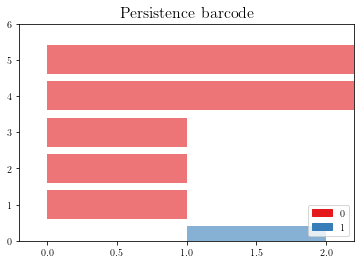

In [9]:
gudhi.plot_persistence_barcode(persistence=BarCodes_Rips, legend=True)